In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import plotly.express as px
import seaborn as sn

# Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier,
                              AdaBoostClassifier,
                              GradientBoostingClassifier)
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from time import time
from time import sleep
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score


#Categories
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df = df.reindex(sorted(df.columns), axis = 1)
df

,adr,adults,agent,arrival_date_day_of_month,arrival_date_month,arrival_date_week_number,arrival_date_year,assigned_room_type,babies,booking_changes,...,meal,previous_bookings_not_canceled,previous_cancellations,required_car_parking_spaces,reservation_status,reservation_status_date,reserved_room_type,stays_in_week_nights,stays_in_weekend_nights,total_of_special_requests
0,0.00,2,NaN,1,July,27,2015,C,0,3,...,BB,0,0,0,Check-Out,2015-07-01,C,0,0,0
1,0.00,2,NaN,1,July,27,2015,C,0,4,...,BB,0,0,0,Check-Out,2015-07-01,C,0,0,0
2,75.00,1,NaN,1,July,27,2015,C,0,0,...,BB,0,0,0,Check-Out,2015-07-02,A,1,0,0
3,75.00,1,304.0,1,July,27,2015,A,0,0,...,BB,0,0,0,Check-Out,2015-07-02,A,1,0,0
4,98.00,2,240.0,1,July,27,2015,A,0,0,...,BB,0,0,0,Check-Out,2015-07-03,A,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,96.14,2,394.0,30,August,35,2017,A,0,0,...,BB,0,0,0,Check-Out,2017-09-06,A,5,2,0
119386,225.43,3,9.0,31,August,35,2017,E,0,0,...,BB,0,0,0,Check-Out,2017-09-07,E,5,2,2
119387,157.71,2,9.0,31,August,35,2017,D,0,0,...,BB,0,0,0,Check-Out,2017-09-07,D,5,2,4
119388,104.40,2,89.0,31,August,35,2017,A,0,0,...,BB,0,0,0,Check-Out,2017-09-07,A,5,2,0


<ul>
  <li>adr: Average Daily Rate </li>
  <li>agent: ID of travel agency</li>
  <li>DaysInWaitingList: Number of days the booking was in the waiting list before it was confirmed to the customer</li>
  <li>DistributionChannel: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”</li>
  <li>LeadTime: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date</li>
  <li>Meal: Undefined/SC – no meal package;
            BB – Bed & Breakfast;
HB – Half board (breakfast and one other meal – usually dinner);
FB – Full board (breakfast, lunch and dinner)</li>    
</ul>

In [3]:
#company has the 94% of na values, I decide to remove it

df.isna().sum()/119390*100

adr                                0.000000
adults                             0.000000
agent                             13.686238
arrival_date_day_of_month          0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_year                  0.000000
assigned_room_type                 0.000000
babies                             0.000000
booking_changes                    0.000000
children                           0.003350
company                           94.306893
country                            0.408744
customer_type                      0.000000
days_in_waiting_list               0.000000
deposit_type                       0.000000
distribution_channel               0.000000
hotel                              0.000000
is_canceled                        0.000000
is_repeated_guest                  0.000000
lead_time                          0.000000
market_segment                     0.000000
meal                            

In [4]:
del df['company']

In [5]:
na_cols = df.isna().any()
na_cols = na_cols[na_cols == True].reset_index()

na_cols = na_cols["index"].tolist()
for col in df.columns[1:]:
     if col in na_cols:
        if df[col].dtype != 'object':
             df[col] =  df[col].fillna(df[col].mean()).round(0)

In [6]:
df.isna().any()

adr                               False
adults                            False
agent                             False
arrival_date_day_of_month         False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_year                 False
assigned_room_type                False
babies                            False
booking_changes                   False
children                          False
country                            True
customer_type                     False
days_in_waiting_list              False
deposit_type                      False
distribution_channel              False
hotel                             False
is_canceled                       False
is_repeated_guest                 False
lead_time                         False
market_segment                    False
meal                              False
previous_bookings_not_canceled    False
previous_cancellations            False
required_car_parking_spaces       False


In [7]:
#Now, I remove the all na rows from the dataset

df = df.dropna()
df.isna().sum()/119390*100

adr                               0.0
adults                            0.0
agent                             0.0
arrival_date_day_of_month         0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_year                 0.0
assigned_room_type                0.0
babies                            0.0
booking_changes                   0.0
children                          0.0
country                           0.0
customer_type                     0.0
days_in_waiting_list              0.0
deposit_type                      0.0
distribution_channel              0.0
hotel                             0.0
is_canceled                       0.0
is_repeated_guest                 0.0
lead_time                         0.0
market_segment                    0.0
meal                              0.0
previous_bookings_not_canceled    0.0
previous_cancellations            0.0
required_car_parking_spaces       0.0
reservation_status                0.0
reservation_

In [8]:
df.dtypes

adr                               float64
adults                              int64
agent                             float64
arrival_date_day_of_month           int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_year                   int64
assigned_room_type                 object
babies                              int64
booking_changes                     int64
children                          float64
country                            object
customer_type                      object
days_in_waiting_list                int64
deposit_type                       object
distribution_channel               object
hotel                              object
is_canceled                         int64
is_repeated_guest                   int64
lead_time                           int64
market_segment                     object
meal                               object
previous_bookings_not_canceled      int64
previous_cancellations            

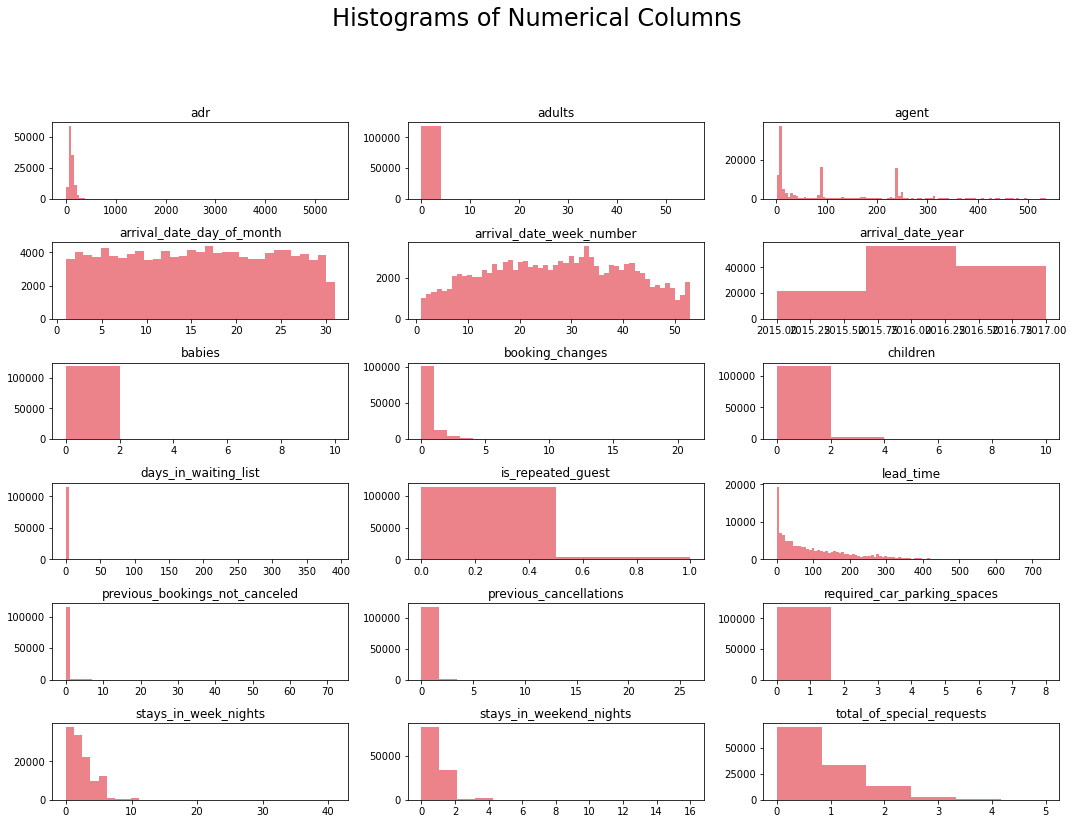

In [9]:
#Exploratory Data Analysis----------------------------------------------------------------------
  
#Plot Histogram of numeric Columns--------------------------------------

dataset2 = df[['adr', 'adults', 'agent', 'arrival_date_day_of_month',
       'arrival_date_week_number', 'arrival_date_year', 'babies',
        'booking_changes', 'children', 'days_in_waiting_list',
       'is_repeated_guest', 'lead_time', 'previous_bookings_not_canceled',
        'previous_cancellations','required_car_parking_spaces',
        'stays_in_week_nights','stays_in_weekend_nights','total_of_special_requests']]

#Histogram:
    
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment = "center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(dataset2.iloc[:, i], bins=vals, color = '#ec838a')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [10]:
df.reset_index(inplace = True)

In [11]:
df.head()

,index,adr,adults,agent,arrival_date_day_of_month,arrival_date_month,arrival_date_week_number,arrival_date_year,assigned_room_type,babies,...,meal,previous_bookings_not_canceled,previous_cancellations,required_car_parking_spaces,reservation_status,reservation_status_date,reserved_room_type,stays_in_week_nights,stays_in_weekend_nights,total_of_special_requests
0,0,0.0,2,87.0,1,July,27,2015,C,0,...,BB,0,0,0,Check-Out,2015-07-01,C,0,0,0
1,1,0.0,2,87.0,1,July,27,2015,C,0,...,BB,0,0,0,Check-Out,2015-07-01,C,0,0,0
2,2,75.0,1,87.0,1,July,27,2015,C,0,...,BB,0,0,0,Check-Out,2015-07-02,A,1,0,0
3,3,75.0,1,304.0,1,July,27,2015,A,0,...,BB,0,0,0,Check-Out,2015-07-02,A,1,0,0
4,4,98.0,2,240.0,1,July,27,2015,A,0,...,BB,0,0,0,Check-Out,2015-07-03,A,2,0,1


C:\Users\testa\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


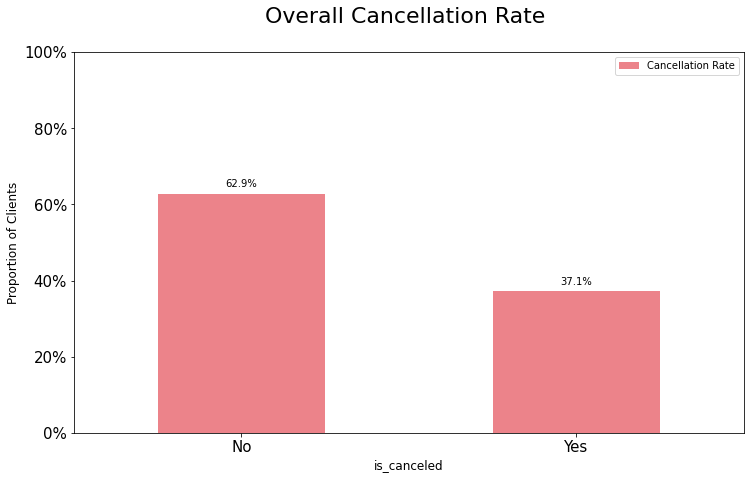

In [12]:
#Overall Cancelletion  Rate------------------------------------------------------------------------------------------

import matplotlib.ticker as mtick
rate = df[["is_canceled", "index"]]
rate ["is_canceled"] = pd.Series(np.where((rate["is_canceled"] == 0), "No", "Yes"))
sectors = rate .groupby ("is_canceled")
rate = pd.DataFrame(sectors["index"].count())
rate ["Cancellation Rate"] = (rate ["index"] / sum(rate ["index"]) )*100
ax =  rate[["Cancellation Rate"]].plot.bar(title = 'Overall Cancellation Rate', legend =True, table = False, grid = False,  subplots = False,  figsize =(12, 7), color = '#ec838a', fontsize = 15, stacked=False, ylim =(0,100))

plt.ylabel('Proportion of Clients',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('is_canceled',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Overall Cancellation Rate \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
x_labels = np.array(rate[["index"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:     
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing
        va = 'bottom'        
        if y_value < 0:           
            space *= -1          
            va = 'top'
        
        label = "{:.1f}%".format(y_value)    
        ax.annotate(
            label,                      
            (x_value, y_value),        
            xytext=(0, space),         
            textcoords="offset points", 
            ha='center',                
            va=va)                                                            
add_value_labels(ax)
ax.autoscale(enable=False, axis='both', tight=False) 

In [13]:
#Correlation from variables
#We don't see any tipe of significant correlation

df.corr()

,index,adr,adults,agent,arrival_date_day_of_month,arrival_date_week_number,arrival_date_year,babies,booking_changes,children,days_in_waiting_list,is_canceled,is_repeated_guest,lead_time,previous_bookings_not_canceled,previous_cancellations,required_car_parking_spaces,stays_in_week_nights,stays_in_weekend_nights,total_of_special_requests
index,1.000000,0.144122,-0.014597,-0.568682,0.009137,-0.054291,0.298836,-0.027918,-0.006747,-0.021127,-0.015397,-0.246253,-0.018973,0.003123,0.004716,-0.018165,-0.129121,-0.208210,-0.150126,0.105453
adr,0.144122,1.000000,0.227431,-0.022097,0.029980,0.075256,0.197919,0.028594,0.019217,0.325033,-0.041325,0.046133,-0.135374,-0.066332,-0.069631,-0.065922,0.058063,0.063647,0.047319,0.171404
adults,-0.014597,0.227431,1.000000,-0.027498,-0.001864,0.025402,0.029107,0.017884,-0.052427,0.029584,-0.008768,0.058408,-0.147496,0.116773,-0.105028,-0.006976,0.016364,0.091991,0.090392,0.121844
agent,-0.568682,-0.022097,-0.027498,1.000000,0.001628,-0.028227,0.059152,0.033713,0.059862,0.039533,-0.054649,-0.077122,0.020051,-0.064677,0.006224,-0.010279,0.152003,0.170832,0.132361,0.031609
arrival_date_day_of_month,0.009137,0.029980,-0.001864,0.001628,1.000000,0.066824,-0.000531,-0.000536,0.010779,0.014571,0.022741,-0.006173,-0.006334,0.002354,0.000121,-0.027009,0.008271,-0.027589,-0.015903,0.003050
arrival_date_week_number,-0.054291,0.075256,0.025402,-0.028227,0.066824,1.000000,-0.540488,0.010038,0.005183,0.005490,0.022992,0.007481,-0.030414,0.126724,-0.020769,0.035366,0.001714,0.015006,0.017640,0.025788
arrival_date_year,0.298836,0.197919,0.029107,0.059152,-0.000531,-0.540488,1.000000,-0.013178,0.031141,0.054504,-0.056813,0.016339,0.010137,0.039974,0.029804,-0.119911,-0.012646,0.031759,0.021678,0.108873
babies,-0.027918,0.028594,0.017884,0.033713,-0.000536,0.010038,-0.013178,1.000000,0.083221,0.024131,-0.010648,-0.032523,-0.008954,-0.021146,-0.006305,-0.007489,0.036971,0.020157,0.018397,0.097597
booking_changes,-0.006747,0.019217,-0.052427,0.059862,0.010779,0.005183,0.031141,0.083221,1.000000,0.048663,-0.011660,-0.144669,0.012166,0.000014,0.011971,-0.027091,0.065727,0.095664,0.062402,0.052423
children,-0.021127,0.325033,0.029584,0.039533,0.014571,0.005490,0.054504,0.024131,0.048663,1.000000,-0.033395,0.004740,-0.032988,-0.038326,-0.020364,-0.024751,0.057063,0.044260,0.045431,0.081777


<AxesSubplot:>

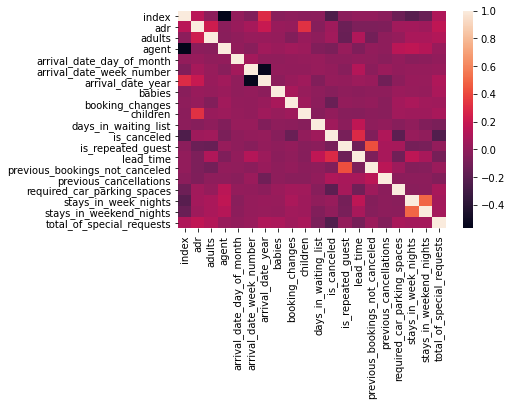

In [14]:
sns.heatmap(df.corr(), 
        xticklabels = df.corr().columns,
        yticklabels = df.corr().columns)

## Feature Engineering and EDA

<p> Total number of people in family </p>

In [15]:
df['family'] = df['adults'] + df['babies'] + df['children']


C:\Users\testa\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
#Drop rows where family = 0 -> no guests

df = df.drop(df[df['family'] == 0].index)

In [17]:
df.head()

,index,adr,adults,agent,arrival_date_day_of_month,arrival_date_month,arrival_date_week_number,arrival_date_year,assigned_room_type,babies,...,previous_bookings_not_canceled,previous_cancellations,required_car_parking_spaces,reservation_status,reservation_status_date,reserved_room_type,stays_in_week_nights,stays_in_weekend_nights,total_of_special_requests,family
0,0,0.0,2,87.0,1,July,27,2015,C,0,...,0,0,0,Check-Out,2015-07-01,C,0,0,0,2.0
1,1,0.0,2,87.0,1,July,27,2015,C,0,...,0,0,0,Check-Out,2015-07-01,C,0,0,0,2.0
2,2,75.0,1,87.0,1,July,27,2015,C,0,...,0,0,0,Check-Out,2015-07-02,A,1,0,0,1.0
3,3,75.0,1,304.0,1,July,27,2015,A,0,...,0,0,0,Check-Out,2015-07-02,A,1,0,0,1.0
4,4,98.0,2,240.0,1,July,27,2015,A,0,...,0,0,0,Check-Out,2015-07-03,A,2,0,1,2.0


<p> Balance of target class </p>

In [18]:
#Balance of target class

df.is_canceled

0         0
1         0
2         0
3         0
4         0
         ..
118897    0
118898    0
118899    0
118900    0
118901    0
Name: is_canceled, Length: 118732, dtype: int64

<p> Distribution of adr </p>

In [19]:
df[df['adr'] == 0]['is_canceled']

0         0
1         0
124       0
166       0
167       0
         ..
118143    0
118274    0
118475    0
118614    0
118636    0
Name: is_canceled, Length: 1799, dtype: int64

In [20]:
#Distribution of adr

df['normalized_adr'] = (df['adr'] - min(df['adr'])) / (max(df['adr']) - min(df['adr'])) * 100
df['normalized_adr']

0         0.118009
1         0.118009
2         1.505259
3         1.505259
4         1.930682
            ...   
118897    1.896278
118898    4.287712
118899    3.035118
118900    2.049061
118901    2.914704
Name: normalized_adr, Length: 118732, dtype: float64

<p> Distribution of people for country </p>

In [21]:
df.country

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
118897    BEL
118898    FRA
118899    DEU
118900    GBR
118901    DEU
Name: country, Length: 118732, dtype: object

In [22]:
country_data = pd.DataFrame(df.loc[df["is_canceled"] == 0]["country"].value_counts())
#country_data.rename(columns={0 : "guests"}, inplace=True)
total_guests = country_data["country"].sum()
country_data["%_guests"] = round(country_data["country"] / total_guests * 100, 2)
country_data["country"] = country_data.index

In [23]:
country_data

,country,%_guests
PRT,PRT,28.12
GBR,GBR,12.96
FRA,FRA,11.35
ESP,ESP,8.56
DEU,DEU,8.13
...,...,...
PYF,PYF,0.00
GUY,GUY,0.00
ASM,ASM,0.00
DJI,DJI,0.00


In [24]:
guest_map = px.choropleth(country_data,
                    locations = country_data.index,
                    color = country_data["%_guests"], 
                    hover_name = country_data.index, 
                    color_continuous_scale = px.colors.sequential.Plasma,
                    title = "Home country of guests")
guest_map.show()

<p> How much did they pay? </p>

In [25]:
df.groupby(['hotel', 'assigned_room_type']).mean()['adr']

hotel         assigned_room_type
City Hotel    A                      96.710937
              B                      94.294642
              C                     102.410190
              D                     121.753369
              E                     144.477991
              F                     178.651526
              G                     184.981047
              K                      72.304920
Resort Hotel  A                      81.652346
              B                     101.749119
              C                     114.765545
              D                      87.504558
              E                     107.919589
              F                     120.897386
              G                     160.279826
              H                     171.877274
              I                      41.750340
              L                       8.000000
Name: adr, dtype: float64

<AxesSubplot:xlabel='arrival_date_month', ylabel='adr'>

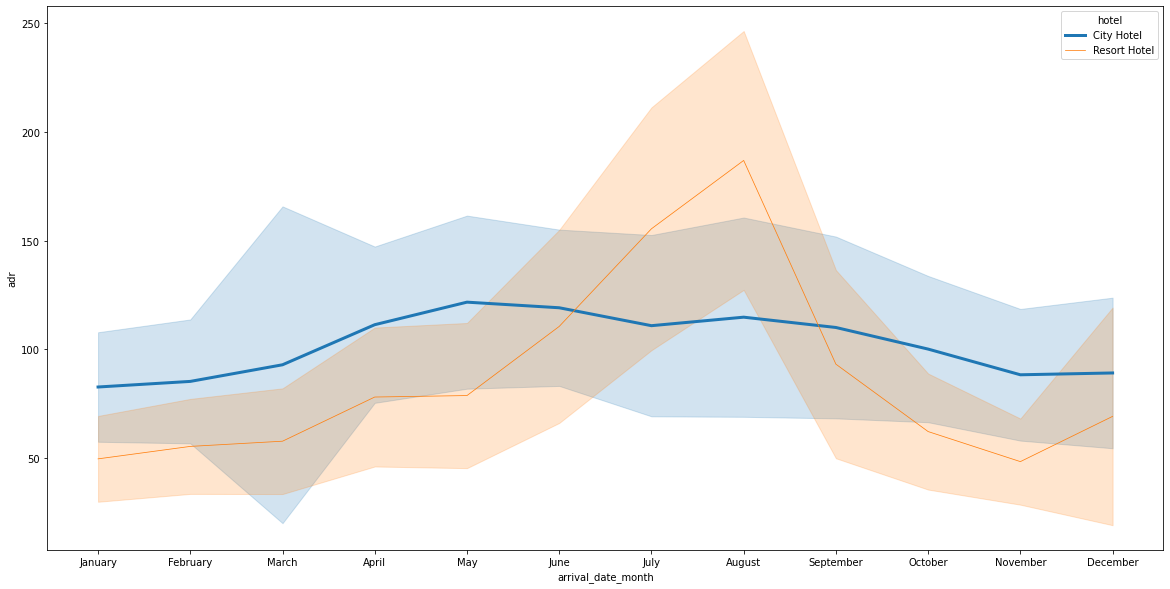

In [26]:
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories = months, ordered = True)
room_prices_mothly = df[["hotel", "arrival_date_month", "adr"]].sort_values("arrival_date_month")
plt.figure(figsize=(20, 10))
sns.lineplot(x = "arrival_date_month", y = "adr", hue = "hotel", data = room_prices_mothly, 
            hue_order = ["City Hotel", "Resort Hotel"], ci = "sd", size = "hotel")

<p> Type of meal </p>

<AxesSubplot:xlabel='meal', ylabel='number'>

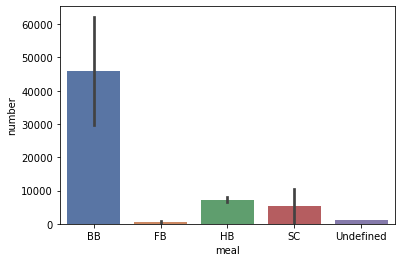

In [27]:
meal_frame = pd.DataFrame(df.groupby(['hotel', 'meal']).count()['index'])
meal_frame = meal_frame.reset_index()
meal_frame.columns = ['hotel', 'meal', 'number']
sns.barplot(x = meal_frame.meal , y = meal_frame.number, palette = "deep")

<p> Most important variables in case of cancellation </p>

In [28]:
cancel_corr = df.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)[1:]

lead_time                         0.291548
index                             0.245757
total_of_special_requests         0.235874
required_car_parking_spaces       0.195018
booking_changes                   0.145147
previous_cancellations            0.109902
is_repeated_guest                 0.084146
agent                             0.077371
adults                            0.056157
previous_bookings_not_canceled    0.055504
days_in_waiting_list              0.054105
normalized_adr                    0.044819
adr                               0.044819
family                            0.043007
babies                            0.032608
stays_in_week_nights              0.024796
arrival_date_year                 0.016335
arrival_date_week_number          0.007681
arrival_date_day_of_month         0.006048
children                          0.004523
stays_in_weekend_nights           0.002230
Name: is_canceled, dtype: float64

## Models

<p> Remove insignificant variables and transform objects variables into dummy variables </p>

In [29]:
del df['customer_type']
del df['deposit_type']
del df['distribution_channel']
del df['market_segment']
del df['reservation_status']
del df['reservation_status_date']
del df['arrival_date_month']

In [30]:
df = pd.get_dummies(df)
df

,index,adr,adults,agent,arrival_date_day_of_month,arrival_date_week_number,arrival_date_year,babies,booking_changes,children,...,meal_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L
0,0,0.00,2,87.0,1,27,2015,0,3,0.0,...,0,0,0,1,0,0,0,0,0,0
1,1,0.00,2,87.0,1,27,2015,0,4,0.0,...,0,0,0,1,0,0,0,0,0,0
2,2,75.00,1,87.0,1,27,2015,0,0,0.0,...,0,1,0,0,0,0,0,0,0,0
3,3,75.00,1,304.0,1,27,2015,0,0,0.0,...,0,1,0,0,0,0,0,0,0,0
4,4,98.00,2,240.0,1,27,2015,0,0,0.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118897,119385,96.14,2,394.0,30,35,2017,0,0,0.0,...,0,1,0,0,0,0,0,0,0,0
118898,119386,225.43,3,9.0,31,35,2017,0,0,0.0,...,0,0,0,0,0,1,0,0,0,0
118899,119387,157.71,2,9.0,31,35,2017,0,0,0.0,...,0,0,0,0,1,0,0,0,0,0
118900,119388,104.40,2,89.0,31,35,2017,0,0,0.0,...,0,1,0,0,0,0,0,0,0,0


In [31]:
del df['index']

<p> Prepare dataset for models </p>

In [32]:
X = df.copy() # Features
del X['is_canceled']
y = df.is_canceled # Target variable

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [34]:
#Feature Scaling-----------------------------------------------------------------------

sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [35]:
X_train.head()

,adr,adults,agent,arrival_date_day_of_month,arrival_date_week_number,arrival_date_year,babies,booking_changes,children,days_in_waiting_list,...,meal_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L
46425,-0.042999,0.250358,-0.751500,1.046635,-1.632326,-0.221883,-0.080012,-0.340795,-0.261062,-0.13185,...,-0.099545,0.624834,-0.09786,-0.088187,-0.438577,-0.240878,-0.158787,-0.13455,-0.070819,-0.007948
22486,-0.611660,0.250358,0.006242,-1.343140,-0.895778,-0.221883,-0.080012,-0.340795,-0.261062,-0.13185,...,-0.099545,-1.600425,-0.09786,-0.088187,-0.438577,4.151480,-0.158787,-0.13455,-0.070819,-0.007948
36950,-0.862655,0.250358,3.144071,-0.318951,-0.232884,1.191065,-0.080012,-0.340795,-0.261062,-0.13185,...,-0.099545,0.624834,-0.09786,-0.088187,-0.438577,-0.240878,-0.158787,-0.13455,-0.070819,-0.007948
52311,0.349180,-1.540863,1.453723,-0.432749,-0.159230,-0.221883,-0.080012,-0.340795,-0.261062,-0.13185,...,-0.099545,0.624834,-0.09786,-0.088187,-0.438577,-0.240878,-0.158787,-0.13455,-0.070819,-0.007948
467,0.829600,0.250358,0.006242,0.136245,0.135390,-1.634830,-0.080012,-0.340795,-0.261062,-0.13185,...,-0.099545,-1.600425,-0.09786,-0.088187,2.280099,-0.240878,-0.158787,-0.13455,-0.070819,-0.007948


<p> List of models </p>

In [36]:
dt = DecisionTreeClassifier()

rf = RandomForestClassifier()

xgb = XGBClassifier(use_label_encoder = False, eval_metric = "logloss")

lgbm = LGBMClassifier()

ada = AdaBoostClassifier()


#n_estimators = 55, criterion = 'gini'
#, learning_rate = 0.65,tree_method = 'hist', max_depth = 12,eval_metric = "logloss"

### First Evaluation of all models with Holdout method

In [82]:
# Training and testing all classifiers extracting accuracy, and run time.

classifiers = [dt, rf, xgb, lgbm, ada]
classifier_name = ["DecisionTree", "Random Forest", "XtremeGradientBoosting", "LightGradientBoosting", "AdaBoost"]
df_results = pd.DataFrame(columns = ['classifier', 'accuracy', 'run_time'])
i = 0
    
for classifier in classifiers:
    # Pipeline
    
    start_time = time()
    classifier.fit(X_train, y_train)
    run_time = time() - start_time
    
    # Test
    predicted = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, predicted)
    df_results = df_results.append({'classifier': classifier_name[i], 'accuracy' : accuracy, 'run_time' : run_time}, ignore_index = True)   
    i += 1
    
df_results

[20:39:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,classifier,accuracy,run_time
0,DecisionTree,0.856445,1.561641
1,Random Forest,0.887523,18.281325
2,XtremeGradientBoosting,0.870805,3.821164
3,LightGradientBoosting,0.866088,0.927002
4,AdaBoost,0.824146,9.162661


<p> Best model is XTremeGradient Boosting, based on the accuracy and the run time </p>

In [83]:
def plot_feature_importance(importance, names, model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by = ['feature_importance'], ascending = False, inplace = True)
    fi_df = fi_df.iloc[:20,]

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'Features Importance')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

<p> Best twenty features for our model to decide if a reservation will be cancelled </p>

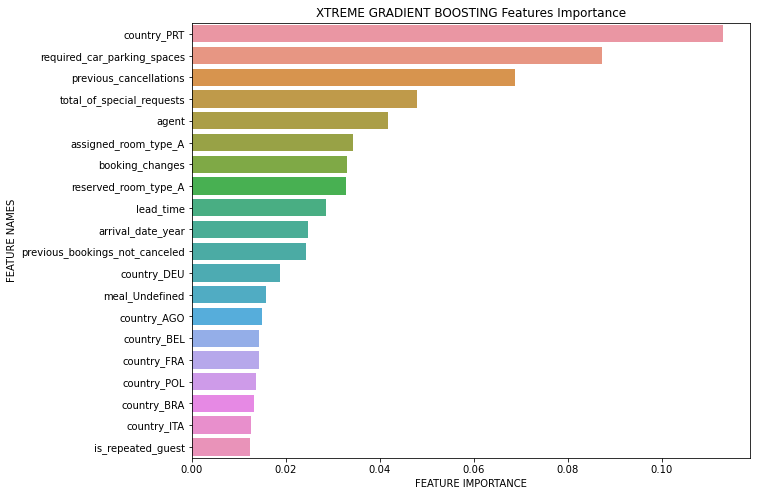

In [84]:
plot_feature_importance(xgb.feature_importances_, X.columns, 'XTREME GRADIENT BOOSTING ')

[20:42:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


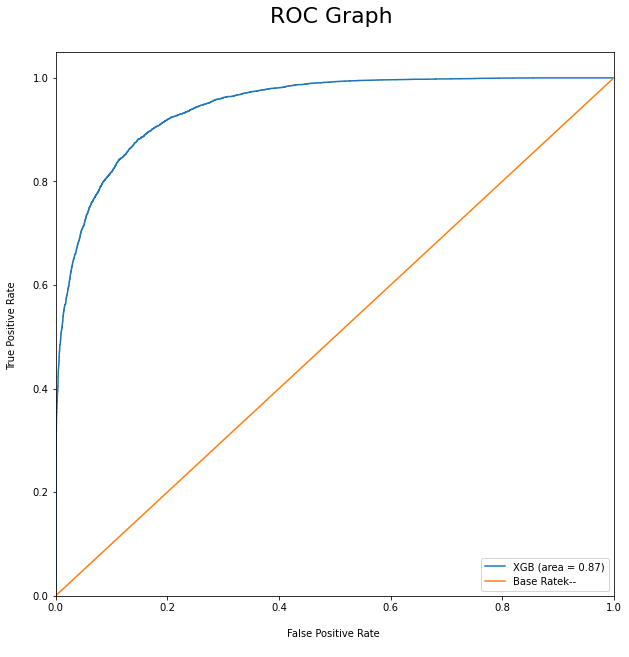

In [85]:
#Evaluate the model using ROC Graph

xgb.fit(X_train, y_train) 
# Predicting the Test set results 
y_pred = xgb.predict(X_test)
probs = xgb.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
plt.figure(figsize=(10, 10))

# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, label='XGB (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])



plt.ylabel('True Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")



plt.show()

### Second Evaluation of all models with 5 CV

<p> We've decided to remove <b>Random Forest</b> and <b>AdaBoost</b> for an eccessive time of computation </p>

In [90]:
# Training and testing all classifiers extracting accuracy, and run time.
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 5, random_state = 0)
classifiers = [dt, xgb, lgbm]
classifier_name = ["DecisionTree", "XtremeGradientBoosting", "LightGradientBoosting"]
df_results = pd.DataFrame(columns = ['classifier', 'accuracy', 'std', 'run_time'])
i = 0
    
for classifier in classifiers:
    
    # Test
    scores = cross_validate(classifier, X, y, cv = cv)
    run_time = scores['fit_time'] + scores['score_time']
    run_time = np.sum(run_time)
    accuracy = scores['test_score'].mean() 
    std = scores['test_score'].std()
    df_results = df_results.append({'classifier': classifier_name[i], 'accuracy' : accuracy, 'std' : std, 'run_time' : run_time}, ignore_index = True)   
    i += 1
    
df_results

,classifier,accuracy,std,run_time
0,DecisionTree,0.857808,0.002541,36.168377
1,XtremeGradientBoosting,0.871856,0.002360,99.440835
2,LightGradientBoosting,0.866328,0.001840,17.992705


<p> Based on Accuracy and Run time we've decided to use XTreme Gradient Boosting </p>

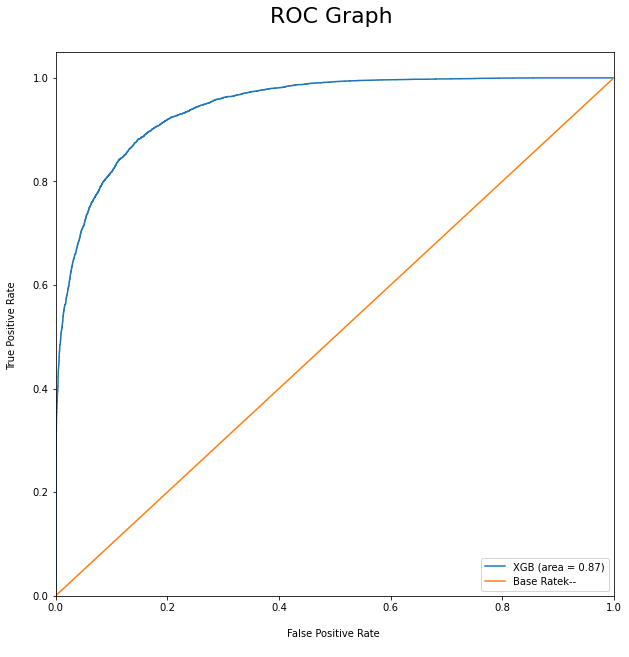

In [94]:
#Evaluate the model using ROC Graph

xgb.fit(X_train, y_train) 
# Predicting the Test set results 
y_pred = xgb.predict(X_test)
probs = xgb.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 10))

# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, label = 'XGB (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1], label = 'Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])



plt.ylabel('True Positive Rate \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc = "lower right", fontsize = "medium")
plt.xticks(rotation = 0, horizontalalignment = "center")
plt.yticks(rotation = 0, horizontalalignment = "right")



plt.show()

Text(0.5, 16.0, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

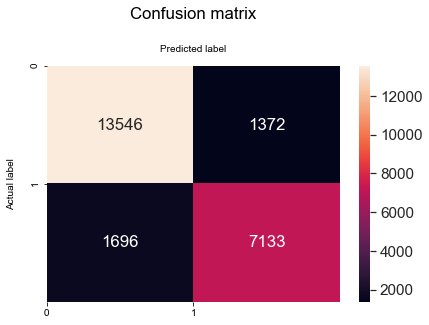

In [95]:
#Visualize results on a Confusion Matrix:
    
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))


fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

### GridSearch on XTremeGradient Boosting

In [37]:
xgb_grid = XGBClassifier(use_label_encoder = False, eval_metric = "logloss", nthread = -1)
param_grid = {
            "n_estimators"     : range(100, 200, 10),
            "learning_rate"    : [0.05, 0.1, 0.3, 0.5],
            "max_depth"        : [3, 5, 7, 10, 12]
            }

cv = RepeatedStratifiedKFold(n_splits = 2, n_repeats = 1, random_state = 0)

grid = GridSearchCV(xgb_grid, param_grid = param_grid, verbose = 1, cv = cv)
start_time = time()
grid.fit(X, y)
run_time = time() - start_time
run_time

Fitting 2 folds for each of 200 candidates, totalling 400 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed: 28.7min finished


1735.3691697120667

In [38]:
grid.best_params_

{'learning_rate': 0.3, 'max_depth': 12, 'n_estimators': 170}

In [45]:
xgb_grid1 = XGBClassifier(use_label_encoder = False, eval_metric = "logloss", learning_rate = 0.3, max_depth = 12, n_estimators = 170, nthread = -1)

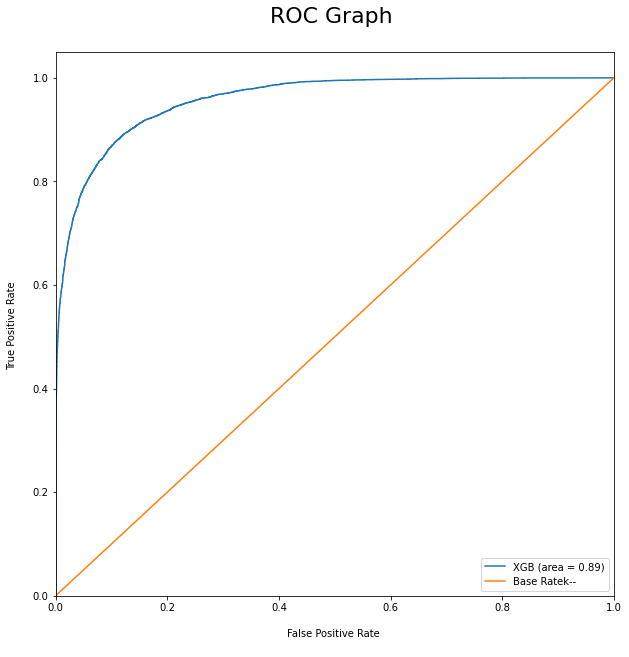

In [46]:
#Evaluate the model using ROC Graph

xgb_grid1.fit(X_train, y_train) 
# Predicting the Test set results 
y_pred = xgb_grid1.predict(X_test)
probs = xgb_grid1.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, xgb_grid1.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 10))

# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, label = 'XGB (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1], label = 'Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])



plt.ylabel('True Positive Rate \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc = "lower right", fontsize = "medium")
plt.xticks(rotation = 0, horizontalalignment = "center")
plt.yticks(rotation = 0, horizontalalignment = "right")



plt.show()

Text(0.5, 16.0, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

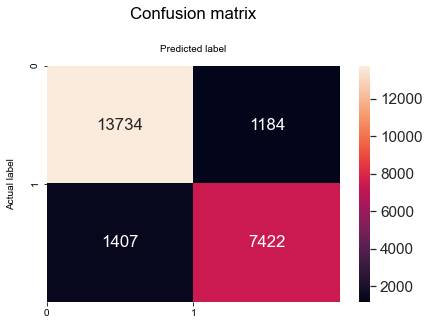

In [47]:
#Visualize results on a Confusion Matrix:

cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))


fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

In [ ]:
#-----------------------------------------------------------------------------------------------

Text(0.5, 16.0, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

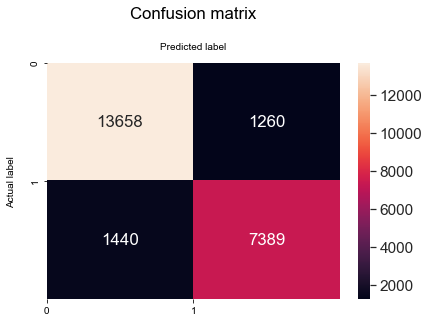

In [94]:
#Visualize results on a Confusion Matrix:
    
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))


fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

### Neural Networks

In [84]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

# keras models
from tensorflow.keras.layers import LSTM, Dense, GRU, Activation, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.models import Sequential, load_model
from keras import backend as K
from keras.optimizers import RMSprop, Adam
from keras.callbacks import ModelCheckpoint

# ELIMINARE DROPOUT PER MIGLIORARE LA RETE E RILANCIARE

In [87]:
model = Sequential()
model.add(Dense(100, input_dim = 224, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()
# Compile model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 100)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               22500     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 32,701
Trainable params: 32,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
2969/2969 [==============================] - 3s 887us/step - loss: 0.4864 - accuracy: 0.7772
Epoch 2/100

KeyboardInterrupt: 

In [86]:
model.evaluate(X_test, y_test, verbose = 1)

ValueError: in user code:

    C:\Users\GIO\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1224 test_function  *
        return step_function(self, iterator)
    C:\Users\GIO\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1215 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\GIO\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\GIO\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\GIO\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\GIO\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1208 run_step  **
        outputs = model.test_step(data)
    C:\Users\GIO\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1174 test_step
        y_pred = self(x, training=False)
    C:\Users\GIO\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:976 __call__
        self.name)
    C:\Users\GIO\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 219 but received input with shape [None, 224]
